<a href="https://colab.research.google.com/github/MichalKosciolek/Introduction-to-Data-Analysis/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from google.colab import drive
from statistics import mean
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Mount google drive and import files
drive.mount('/content/drive')
Adelaide = pd.read_csv('/content/drive/MyDrive/Data_analitics/Adelaide_Data.csv', header=None)
Perth = pd.read_csv('/content/drive/MyDrive/Data_analitics/Perth_Data.csv', header=None)
Sydney = pd.read_csv('/content/drive/MyDrive/Data_analitics/Sydney_Data.csv', header=None)
Tasmania = pd.read_csv('/content/drive/MyDrive/Data_analitics/Tasmania_Data.csv', header=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Creating of data frames for each city
Perth_df = pd.DataFrame(Perth)
Adelaide_df = pd.DataFrame(Adelaide)
Sydney_df = pd.DataFrame(Sydney)
Tasmania_df = pd.DataFrame(Tasmania)

# Adding names to columns, for easier computing and navigating
dataframe_columns = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14", "X15", "X16",
              "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16",
              "P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8", "P9", "P10", "P11", "P12", "P13", "P14", "P15", "P16",
              "OUTPUT"]

Perth_df.columns = dataframe_columns
Adelaide_df.columns = dataframe_columns
Sydney_df.columns = dataframe_columns
Tasmania_df.columns = dataframe_columns

Perth_df.to_numpy()
Adelaide_df.to_numpy()
Sydney_df.to_numpy()
Tasmania_df.to_numpy()

Perth_df.head()

X1        X2        X3      X4        X5        X6        X7  \
0  427.0737  155.1636  476.0661  5.7677  255.5230  410.5835  516.3158   
1  427.4820  147.4593  474.9960  9.5407  258.2593  404.2589  524.3422   
2  423.7709  155.9451  470.8182  4.0438  253.8868  390.2231  509.0224   
3  431.8288  146.6720  466.1145  7.0164  261.3787  408.9941  521.9852   
4  437.7897  141.3579  474.3819  4.3434  256.5644  393.0113  516.1617   

        X8       X9       X10  ...           P8          P9         P10  \
0  47.4719  75.7125  463.0522  ...  100328.8932  79696.1132  90093.0925   
1  44.4009  70.4385  468.8828  ...   98879.6861  82893.9171  89158.6518   
2  50.7996  72.8076  463.4203  ...  100504.0370  81572.7820  89932.3496   
3  44.0360  77.5854  450.5736  ...   99857.6062  82267.0302  88657.7954   
4  52.4880  66.1179  457.0365  ...   99953.9882  80579.2854  88819.3409   

          P11          P12         P13         P14          P15         P16  \
0  79395.6995  100893.8537  91116.6415  98560.6700   99789.2341  78199.7899   
1  80356.5067  100927.1007  89760.5631  97828.2206   99214.7876  79108.3094   
2  80588.3130  100977.1693  90274.1347  97757.2251   99333.6857  79691.2458   
3  79139.2437  100480.0554  91102.1702  98224.0435  100672.3076  78387.9296   
4  80145.6969  100693.3759  89663.6079  97947.9575  100924.1871  80104.7240   

        OUTPUT  
0  1480707.346  
1  1479133.940  
2  1475814.243  
3  1484052.684  
4  1479350.362  

[5 rows x 49 columns]

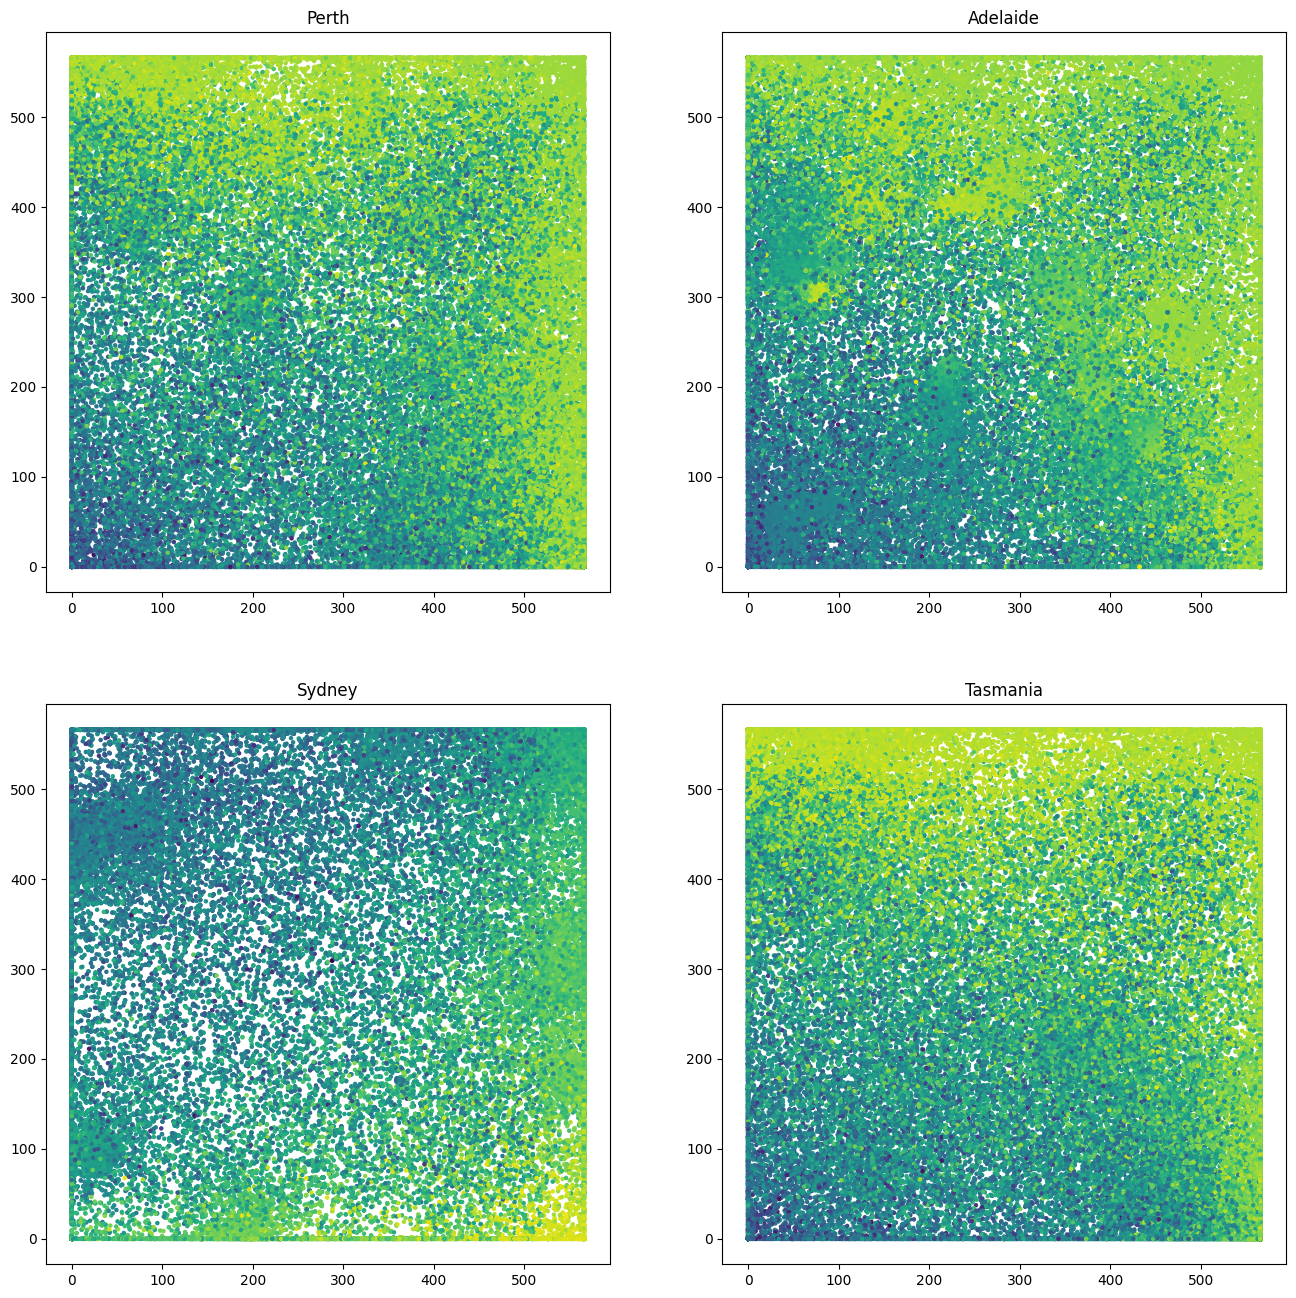

In [27]:
# This code shows how the energy production works for each city

fig, axs = plt.subplots(2, 2, figsize=(16, 16))
b_nr = 0+0

##################################### Perth plot
X = []
Y = []
P = []
for index, row in Perth_df.iterrows():
  X.append(row[0 + b_nr])
  Y.append(row[16 + b_nr])
  P.append(row[32 + b_nr])

axs[0, 0].set_title('Perth')
axs[0, 0].scatter(X, Y, c=P, cmap='viridis', s=5)

##################################### Adelaide plot
X = []
Y = []
P = []
for index, row in Adelaide_df.iterrows():
  X.append(row[0 + b_nr])
  Y.append(row[16 + b_nr])
  P.append(row[32 + b_nr])

axs[0, 1].set_title('Adelaide')
axs[0, 1].scatter(X, Y, c=P, cmap='viridis', s=5)

##################################### Sydney plot
X = []
Y = []
P = []
for index, row in Sydney_df.iterrows():
  X.append(row[0 + b_nr])
  Y.append(row[16 + b_nr])
  P.append(row[32 + b_nr])

axs[1, 0].set_title('Sydney')
axs[1, 0].scatter(X, Y, c=P, cmap='viridis', s=5)

##################################### Tasmania plot
X = []
Y = []
P = []
for index, row in Tasmania_df.iterrows():
  X.append(row[0 + b_nr])
  Y.append(row[16 + b_nr])
  P.append(row[32 + b_nr])

axs[1, 1].set_title('Tasmania')
axs[1, 1].scatter(X, Y, c=P, cmap='viridis', s=5)

plt.show()

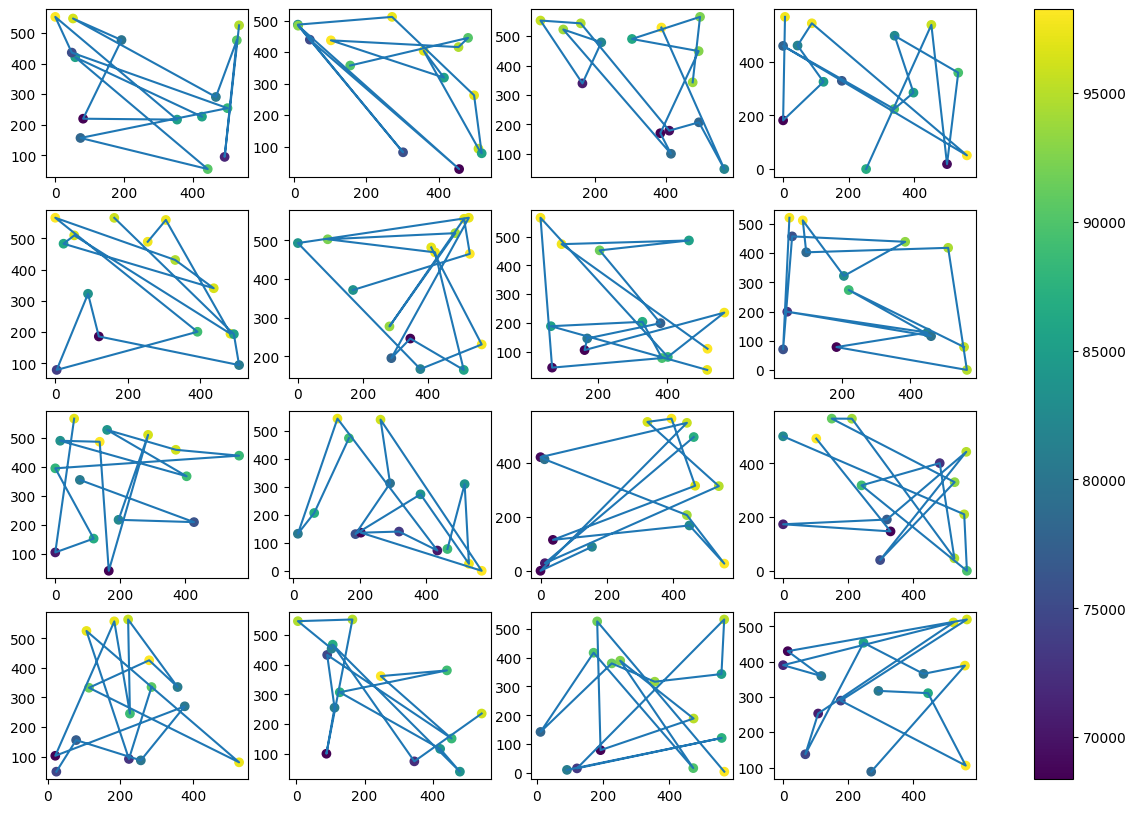

In [29]:
# This code shows the way the machines were moving in Perth
# Single dot is made after every 5000 measurement
# In this case we can see, that the machine could go anywhere

X_s = []
Y_s = []
P_s = []

fig, axs = plt.subplots(4, 4, figsize=(15,10))
axs = axs.ravel()

index = 0
for i in range(0, 16):
  for ind, row in Perth_df.iterrows():
    if ind % 5000 == 0:
      X_s.append(row[i])
      Y_s.append(row[i + 16])
      P_s.append(row[i + 32])

  ax = axs[i]
  ax.plot(X_s, Y_s)
  scatter = ax.scatter(X_s, Y_s, c=P_s, cmap='viridis')

  X_s.clear()
  Y_s.clear()
  P_s.clear()

fig.colorbar(scatter, ax=axs.ravel().tolist())

plt.show()

In [ ]:
# Average coordinate plot

X = []
Y = []
P = []
for index, row in Perth_df.iterrows():
  x = 0
  y = 0
  p = 0
  for i in range(0, 16):
    x += row[i]
    y += row[i + 16]
    p += row[i + 32]
  X.append(x/16)
  Y.append(y/16)
  P.append(p/16)

plt.figure(figsize=(15,10))
plt.scatter(X, Y, c=P, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# Functions to standardize used data

def standardize(X):
    x_mean = np.mean(X, 0)
    x_std = np.std(X, 0)
    return (X - x_mean) / x_std, x_mean, x_std

def destandardize(X, means, sds):
    return X * sds + means

DataFrame: Perth, Degree: 1 -> Rooted mean squared error: 0.9237595084288281
DataFrame: Perth, Degree: 2 -> Rooted mean squared error: 0.42520952835651643
DataFrame: Perth, Degree: 3 -> Rooted mean squared error: 0.39301651055587644

DataFrame: Tasmania, Degree: 1 -> Rooted mean squared error: 0.9282982234447974
DataFrame: Tasmania, Degree: 2 -> Rooted mean squared error: 0.520470573299433
DataFrame: Tasmania, Degree: 3 -> Rooted mean squared error: 0.5020495548892691

DataFrame: Adelaide, Degree: 1 -> Rooted mean squared error: 0.9043663692455258
DataFrame: Adelaide, Degree: 2 -> Rooted mean squared error: 0.3901857458738745
DataFrame: Adelaide, Degree: 3 -> Rooted mean squared error: 0.3569643172887143

DataFrame: Sydney, Degree: 1 -> Rooted mean squared error: 0.9341891173420593
DataFrame: Sydney, Degree: 2 -> Rooted mean squared error: 0.4139277342415314
DataFrame: Sydney, Degree: 3 -> Rooted mean squared error: 0.40805800512886464



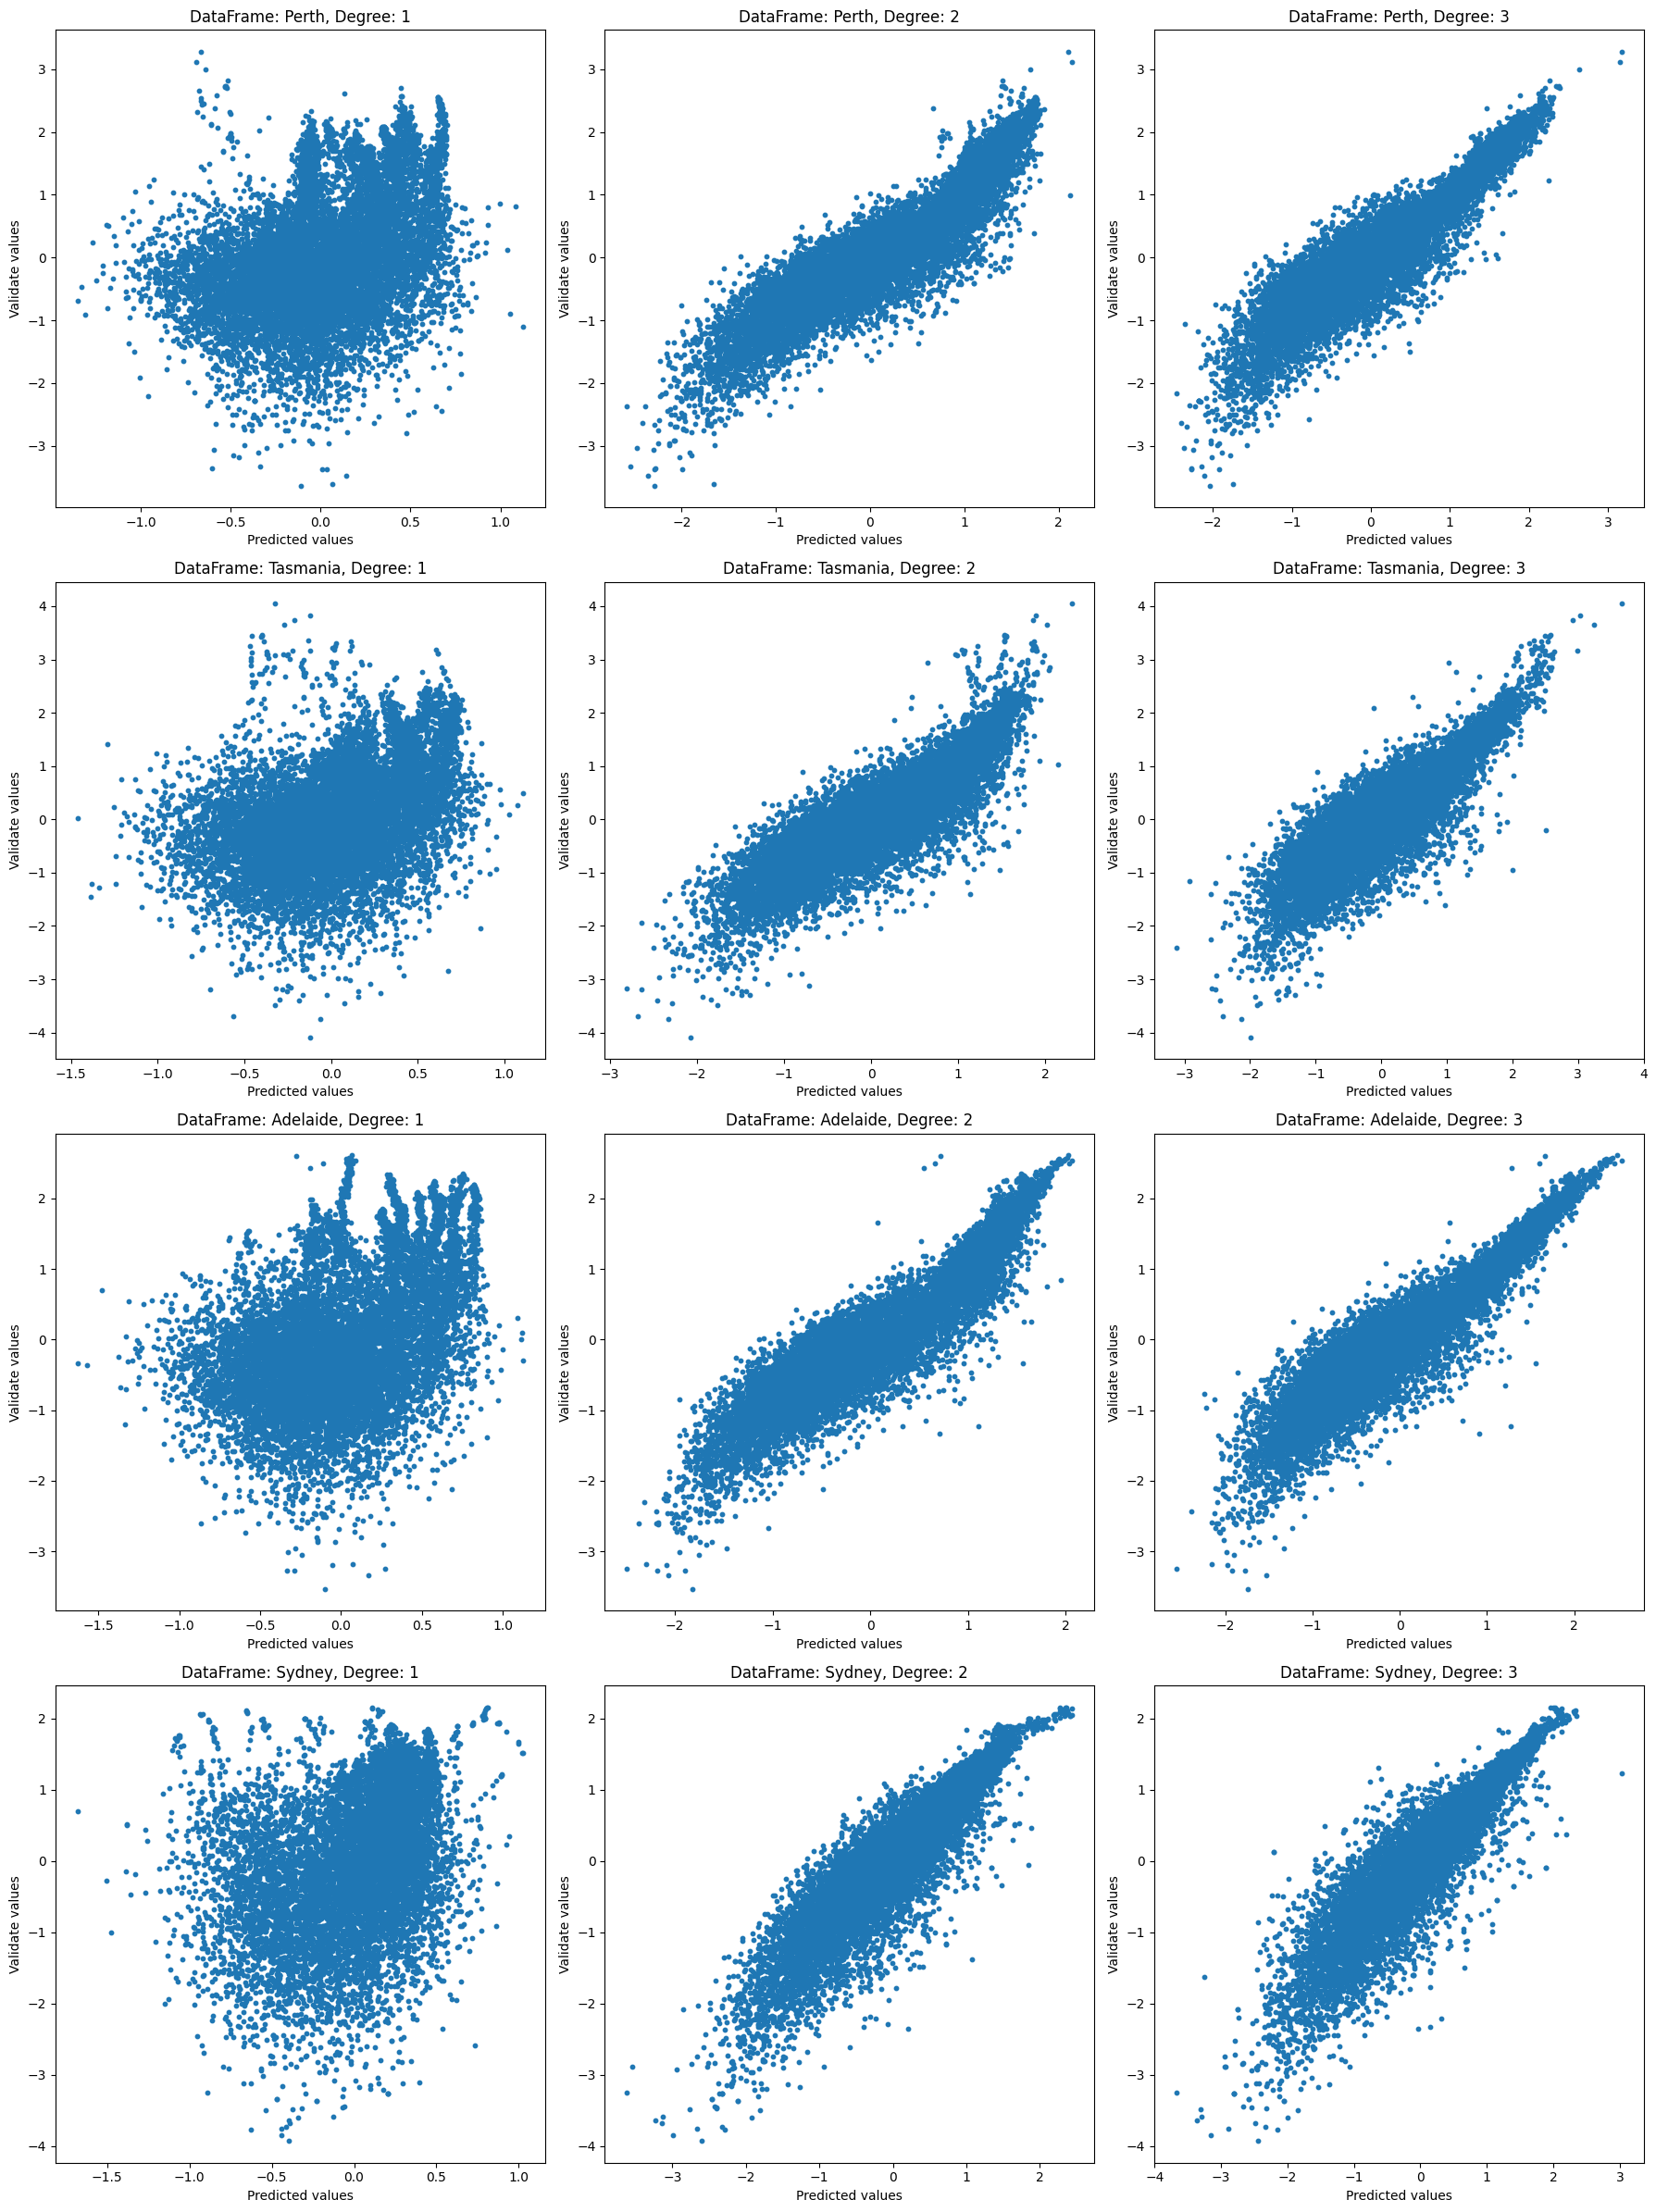

In [5]:
# List of dataframes
df_list = [Perth_df, Tasmania_df, Adelaide_df, Sydney_df]
df_names = ['Perth', 'Tasmania', 'Adelaide', 'Sydney']

# Preparing plot space
fig, axs = plt.subplots(4, 3, figsize=(18, 24))

models = []
polies = []
XY_tests = []
P_tests = []
rmse = []
for i, df in enumerate(df_list):
    # Preparing data for model
    XY_columns = df.columns[:32]
    XY_coordinates = df[XY_columns]
    P_value = df[['OUTPUT']]

    # Standardizing data
    XY_coordinates_std, xy_mean, xy_std = standardize(XY_coordinates)
    P_value_std, p_mean, p_std  = standardize(P_value)

    # Splitting data into 3 parts:
    # Training set    - 70%
    # Validating set  - 15%
    # Testing set     - 15%
    XY_coordinates_train, XY_coordinates_rest, P_value_train, P_value_rest = train_test_split(XY_coordinates_std, P_value_std, test_size=0.3, random_state=43)
    XY_coordinates_test, XY_coordinates_validate, P_value_test, P_value_validate = train_test_split(XY_coordinates_rest, P_value_rest, test_size=0.5, random_state=43)
    XY_tests.append(XY_coordinates_test)
    P_tests.append(P_value_test)

    # Calculating models and plotting them
    for degree in range(1, 4):
        # Creating polynomial features for linear model
        poly = PolynomialFeatures(degree, include_bias = True)
        poly_features = poly.fit_transform(XY_coordinates_train)
        polies.append(poly)

        # Creating and fitting the model
        model = LinearRegression()
        model.fit(poly_features, P_value_train)
        models.append(model)

        # Predicting the values
        P_value_pred = model.predict(poly.fit_transform(XY_coordinates_validate))

        # Printing the error for each degree model
        rmse_current = mean_squared_error(P_value_pred, P_value_validate, squared=False)
        rmse.append(rmse_current)
        print("DataFrame: {0}, Degree: {1} -> Rooted mean squared error: {2}".format(df_names[i], degree, rmse_current))

        # Plotting part
        axs[i, degree-1].scatter(np.array(P_value_pred), np.array(P_value_validate), s=10)
        axs[i, degree-1].set_title('DataFrame: {0}, Degree: {1}'.format(df_names[i], degree))
        axs[i, degree-1].set_xlabel('Predicted values')
        axs[i, degree-1].set_ylabel('Validate values')

    print()

plt.tight_layout()
plt.show()

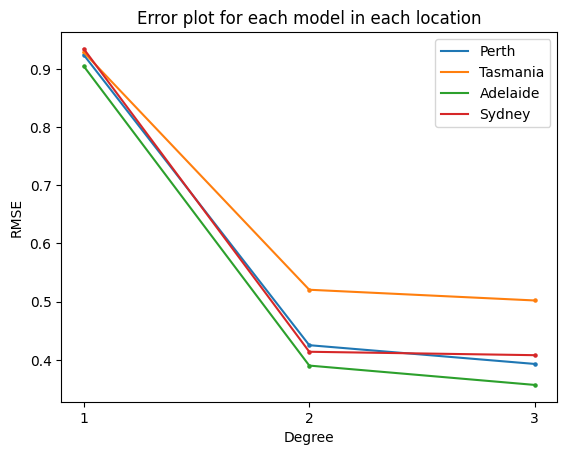

In [11]:
#Plotting error plot for models

current_ds_error = []
degree = [1, 2, 3]
df_index = 0
for i in range(1, 13):
  current_ds_error.append(rmse[i - 1])
  if i % 3 == 0:
    plt.scatter(degree, current_ds_error, s=5)
    plt.plot(degree, current_ds_error, label=df_names[df_index])
    df_index += 1
    current_ds_error.clear()

plt.title('Error plot for each model in each location')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.xticks(degree)
plt.legend()
plt.show()


Rooted mean squared error for Adelaide best model (test set): 0.36391149726760175



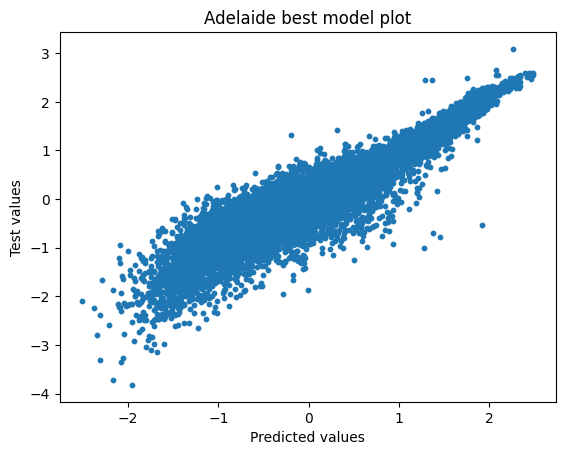

In [21]:
# After finding the best model, we will move on to final testing

# Plotting predicted and test values for best model
predicted_power = models[8].predict(polies[8].fit_transform(XY_tests[2]))
plt.scatter(predicted_power, P_tests[2], s=10)
plt.title('Adelaide best model plot')
plt.xlabel('Predicted values')
plt.ylabel('Test values')

# Printing RMSE
print("Rooted mean squared error for Adelaide best model (test set): {0}".format(mean_squared_error(predicted_power, P_tests[2], squared=False)))
print()

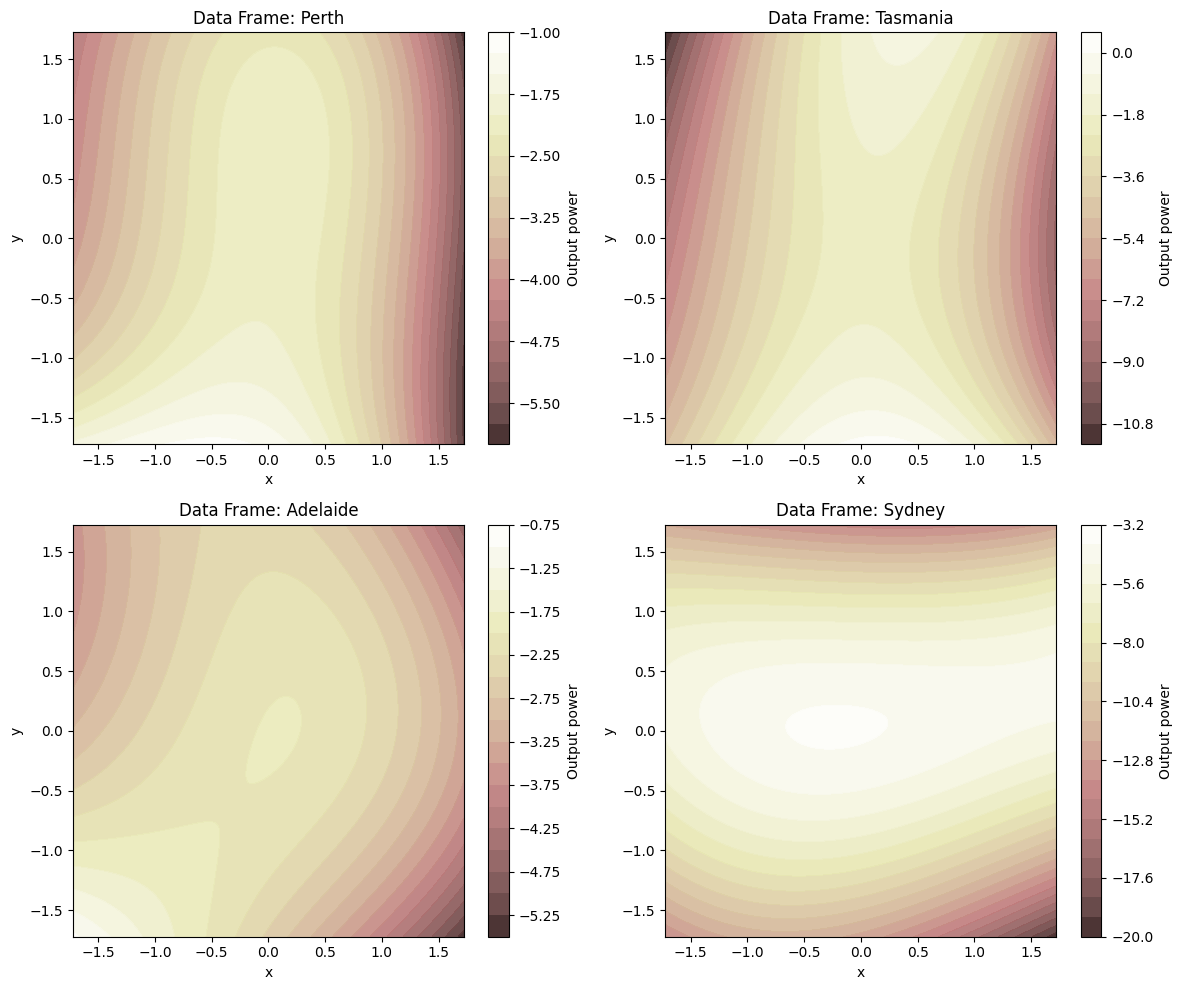

In [23]:
# Plotting heatmaps which input is rigidly set grid on 0 - 566 coordinates

# Grid size
n = 201

# Linspace
x_values = np.linspace(0, 566, n)
y_values = np.linspace(0, 566, n)

# Standardization
x_values_std, x_mean, x_std = standardize(x_values)
y_values_std, y_mean, y_std = standardize(y_values)

# Initializing grid
xv, yv = np.meshgrid(x_values_std, y_values_std)
xy_plot = np.zeros((n*n, 32))
xy_plot_2d = np.zeros((n, n))

# Initializing input data
ind = 0
for i in range(n):
  for j in range(n):
    xy_plot[ind][:16] = xv[i, j]
    xy_plot[ind][16:33] = yv[i, j]
    ind += 1

# Predicting output and plotting heatmaps
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
model_index = 2
for m in range(4):

  # Predicting power output
  p_pred_plot = models[model_index].predict(polies[model_index].fit_transform(xy_plot))
  model_index += 3

  # Filling a grid for plot
  ind = 0
  for i in range(n):
    for j in range(n):
      xy_plot_2d[i][j] = p_pred_plot[ind]
      ind += 1

  # Plotting heatmaps
  ax = axes[m // 2, m % 2]
  c = ax.contourf(xv, yv, xy_plot_2d, 20, alpha=0.9, cmap=cm.pink)
  cbar = fig.colorbar(c, ax=ax)
  cbar.set_label('Output power')
  ax.set_title(f'Data Frame: {df_names[m]}')
  ax.set_xlabel('x')
  ax.set_ylabel('y')

plt.tight_layout()
plt.show()